In [1]:
from utils import *
import numpy as np
from datasets import ptb
import dezero.layers as L
import dezero.functions as F
from dezero.optimizers import SGD
from dezero import Variable,Model
import matplotlib.pyplot as plt

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_eopch = 1000

text = "You say goodbye and I say hello."
corpus, w2i, i2w = preprocess(text)

vocab_size = len(w2i)
contexts, target = create_contexts_target(corpus, window_size)
target = Variable(target)

In [3]:
class CBOW(Model):
    def __init__(self, vocab_size, hidden_dim = 10):
        super().__init__()
        self.embeddings = L.EmbedID(vocab_size, hidden_dim)
        self.l = L.Linear(out_size = vocab_size)
        
    def forward(self,x, y):
        embeds = self.embeddings(x).sum(axis = 0,keepdims=True) / len(x)
        return self.l(embeds)

In [4]:
model = CBOW(vocab_size, hidden_size)
optimizer = SGD().setup(model)

In [5]:
target

variable([1 2 3 4 1 5])

In [6]:
ret = {}
ret["train_loss"] = []
for eopch in range(max_eopch):
    train_loss = 0
    for X,y in zip(contexts, target):
        pred_y = model(X)
        loss = F.softmax_cross_entropy(pred_y, y)
        train_loss += loss.data
        model.cleargrads()
        loss.backward()
        optimizer.update()
    ret['train_loss'] += [train_loss]

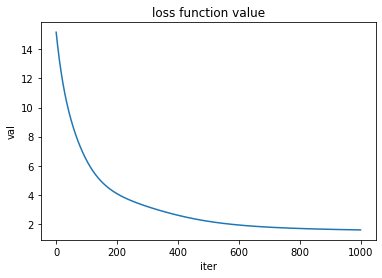

In [7]:
plt.plot(ret['train_loss'])
plt.title('loss function value')
plt.xlabel('iter')
plt.ylabel('val')
plt.show()

In [9]:
# 得られた各単語の埋め込みベクトル
for word_id, word in i2w.items():
    print("{} : {}".format(word, model.embeddings(word_id)))

you : variable([-2.06395613 -0.06263073 -0.14475852 -2.27086734 -0.90814606])
say : variable([ 1.60456204 -1.50774551 -1.3597249   0.2271803   1.79784491])
goodbye : variable([-0.04131626  0.49353325  0.58386578  0.91915223 -2.27918437])
and : variable([ 0.69235561  0.64872914 -0.63931338 -1.5848414   0.96282079])
i : variable([ 0.1797985   2.00473532  0.53719717  0.37147008 -0.69751361])
hello : variable([-1.11085657  1.13326664 -0.53817663 -0.8723184   0.51293615])
. : variable([-2.96991756  0.30851148 -1.34492272  1.46553848 -0.40043004])


In [10]:
import collections

In [26]:
a = np.random.randint(10,size = (10))

In [27]:
a

array([9, 2, 2, 5, 4, 4, 8, 1, 9, 2])

In [28]:
collections.Counter(a)

Counter({9: 2, 2: 3, 5: 1, 4: 2, 8: 1, 1: 1})

In [29]:
a = np.arange(100).reshape(2,10,5)
b = np.arange(200).reshape(4,10,5)

In [33]:
import torch

In [35]:
a = torch.tensor(a)

In [36]:
b = torch.tensor(b)